In [1]:
#Import of libraries

import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from math import sqrt,pi,exp

In [4]:
#print actual path to the repertory
import os
os.getcwd()

'/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP1'

In [8]:
#1.1
df = pd.read_csv("/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP1/cockatoo.csv",sep=',')

In [9]:
#1.2
print(df.head()) #describe the beginning of the dataset
print(df.shape) #give the size of the data matrix

                   Species  LifeSpan  Size  Weight  ClutchSize  HatchTime
0    Nymphicus hollandicus        15    32      90           5         20
1  Calyptorhynchus banksii        45    60     742           2         30
2  Calyptorhynchus lathami        40    50     435           1         29
3            Zanda funerea        40    60     825           2         29
4        Zanda latirostris        25    55     655           2         29
(21, 6)




Average life span:
36.714285714285715
Life span variance:
150.20408163265307


Standard deviation of the life span:
12.255777479729838


Median size:
45.0


(array([1., 0., 0., 1., 2., 1., 2., 2., 3., 9.]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <BarContainer object of 10 artists>)

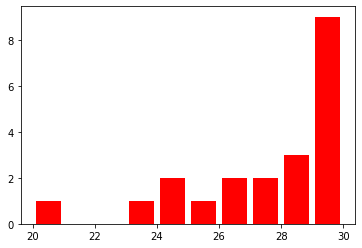

In [10]:
#1.3
print("\n")
print("Average life span:")
print(np.mean(df["LifeSpan"]))
print("Life span variance:")
print(np.var(df["LifeSpan"]))
print("\n")
print("Standard deviation of the life span:")
print(np.std(df["LifeSpan"]))

print("\n")
print("Median size:")
print(np.median(df["Size"]))


plt.hist(df["HatchTime"],bins=range(20,31),color='red',rwidth=0.8)

    Lab1    Lab2  Lab3   Lab4    Lab5    Lab6   Lab7 Avg lab mark Project  \
0  10,75  16,875    16     17  13,375  12,875   18,5  15,77083333      11   
1  13,25  14,625  13,5  6,875  12,375      15  14,25  13,83333333      11   
2  15,25      15  5,25   10,5   13,75    14,5  13,75  13,79166667      12   
3     16    16,5  17,5  13,25  18,125      19     19      17,6875       9   
4  15,25  19,125    20   15,5    16,5      20     17  18,02083333      14   

  Final Exam☼   Final Mark  Rank GPA  
0        9,75  11,56770833    40   D  
1        9,75  11,08333333    43   D  
2        7,25  10,07291667    50   E  
3       16,75    15,046875     7   B  
4          14  15,00520833     8   B  
(57, 13)


TypeError: Could not convert 15,7708333313,8333333313,7916666717,687518,0208333316,3958333314,437518,0208333313,1666666711,8958333318,437515,7708333318,3541666717,937514,437517,3541666716,687518,5208333313,8958333316,3958333313,6041666718,437516,812517,687517,062518,0208333313,5833333317,4791666715,8541666717,5833333317,454,66666666715,6041666716,0208333317,812515,354166678,35416666711,62517,6666666717,3541666715,5833333316,3958333311,8541666716,2916666715,5833333318,1041666717,37517,12516,2083333313,7916666715,2708333313,854166675,54166666716,0833333316,2916666716,0208333316,70833333 to numeric

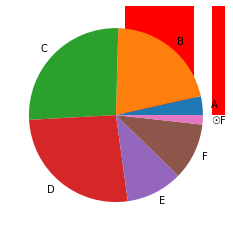

In [15]:
#2
df2 = pd.read_csv("/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP1/notes.csv", on_bad_lines='skip', sep=';')
print(df2.head()) #describe the beginning of the dataset
print(df2.shape) #give the size of the data matrix


figure,axe = plt.subplots(figsize=(10,4))
plt.hist(df2["Lab1"],bins=range(0,20),color='red',rwidth=0.8)
plt.hist(df2["Lab3"],bins=range(0,20),color='red',rwidth=0.8)
plt.hist(df2["Lab7"],bins=range(0,20),color='red',rwidth=0.8)


unique, counts = np.unique(df2["GPA"], return_counts=True)
values = dict(zip(unique, counts));
plt.pie(values.values(), labels=values.keys())

#if we suppose that both follow a gaussian law, then you just need to compute the mean vlaues and standard deviation for both columns. Then use the IC95 formula for differences of mean.
mean_lab=np.mean(df2["Avg lab mark"])
var_lab=np.var(df2["Avg lab mark"])
mean_exam=np.mean(df2["Final Exam"])
var_exam=np.var(df2["Final Exam"])
n=df2["Final Exam"].size
IC95inf=abs(mean_lab-mean_exam)-1.96*sqrt((var_lab+var_exam)/n)
IC95sup=abs(mean_lab-mean_exam)+1.96*sqrt((var_lab+var_exam)/n)

print(abs(mean_lab-mean_exam))
print("The difference interval is ["+str(IC95inf)+";"+str(IC95sup)+"]")

In [ ]:
#3

Mark = [6,8,9,10,11,12,13,14,17]
Number = [10,12,48,23,24,48,9,14,22]

#Then we plot these arrays, as an histogram
figure,axe = plt.subplots(figsize=(10,4))
plt.hist(Mark,bins=22,color='red',weights=Number,rwidth=0.8)
axe.set_title("Histogram of the dataset")
axe.set_xlabel("Mark")
axe.set_ylabel("Frequency")


totalmark=[a*b for a,b in zip(Mark,Number)]

mean = np.sum(totalmark)/np.sum(Number)


dispersion_mark_median = stats.binned_statistic(Number,Mark,statistic="median",bins=1)
median = dispersion_mark_median[0][0]

numvar = []
i=0
while i<len(Mark):
    numvar.append(Number[i]*(Mark[i]-mean)**2)
    i+=1

variance = sum(numvar)/sum(Number)

dispersion_mark_min = stats.binned_statistic(Number,Mark,statistic="min",bins=1)
min = dispersion_mark_min[0][0]


dispersion_mark_max = stats.binned_statistic(Number,Mark,statistic="max",bins=1)
max = dispersion_mark_max[0][0]


mode = Mark[np.argmax(Number)]


sumarray = np.dot(Mark,Number)



#We display everything

print("Min: {0} ".format(min))
print("Mean: {0} ".format(mean))
print("Variance: {0} ".format(variance))
print("Standard deviation: {0}  ".format(sqrt(variance)))
print("Median: {0} ".format(median))
print("Max: {0} ".format(max))
print("Mode: {0} ".format(mode))

In [ ]:


#4
df3 = pd.read_csv("malnutrition.csv",header=None)
print(df3.head())

meanQImalnut=np.mean(df3)
stdQImalnut=np.std(df3)

print("\n")
print("Malnutrition sample size: "+str(df3.size))
print("Mean QI with malnutrition:" +str(meanQImalnut))
print("QI std with malnutrition: "+str(stdQImalnut))


IC95minus=meanQImalnut-1.96*stdQImalnut/sqrt(df3.size)
IC95plus=meanQImalnut+1.96*stdQImalnut/sqrt(df3.size)

print("\n")
print("IC95 QI malnutrition: ["+str(IC95minus)+";"+str(IC95plus)+"]")  #100 n'est pas dans l'intervalle à 95%, l'effet est donc significatif